In [1]:
from astral import LocationInfo
from astral.sun import sun
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import seaborn as sns
import sys

### Format data for plotting

In [2]:
def getStandardizedDatetime(row, originaltzstring):
    originaltz = pytz.timezone(originaltzstring)
    originaldt = dt.datetime(row["Year"], row["Month"], row["Day"], row["Hour"], row["Min"], row["Sec"], 0, originaltz)
    return originaldt.astimezone(pytz.timezone("Pacific/Honolulu"))
    
def getTimeOfDay(hour):

    # call api later
    sunrise = 6
    sunset = 18
    
    if hour in range(sunrise + 1, sunset - 1):
        return 'Day'
    elif hour in range(sunset + 1, 24) or hour in range(0, sunrise - 1):
        return 'Night'
    elif hour in range(sunrise - 1, sunrise + 1):
        return 'Dawn'
    else:
        return 'Dusk'


def getPlotData(filename): ## call getPlotDataAstral from here? astral=False, latLonFile=None
    """
    Given a filename to corrected archival White Shark tag
    data, returns a pandas dataframe containing data for
    plotting
    """
    df = pd.read_csv(filename)
    
    # Get timezone of date/time
    dateColName = df.columns[0]
    originaltz = ''
    if dateColName == "Date(UTC-8)":
        originaltz = 'Etc/GMT+8' # why? no one knows
    elif dateColName == "Date(EST)":
        originaltz = 'UTC' # Why? EST was mistake
    elif dateColName == "Date":
        originaltz = 'UTC'
    else:
        raise ValueError("Cannot processes timezone of Date column" + dateColName)
    
    # Build standard datetime
    df["Datetime (UTC-10)"] = df.apply(lambda row: getStandardizedDatetime(row, originaltz), axis=1)
    
    # add hour column
    df["Hour (UTC-10)"] = df["Datetime (UTC-10)"].apply(lambda x: x.hour)
    
    # add time of day column
    df["Time of Day"] = df["Hour (UTC-10)"].apply(getTimeOfDay)
    
    return df

### Plots duration of data

Science

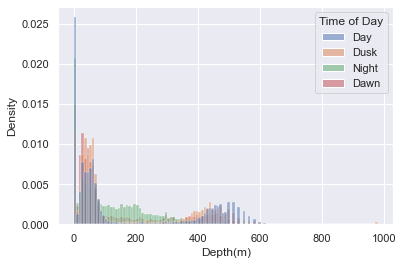

,Date(EST),Time(EST),Depth(m),Lt,IntTemp(C),ExtTemp(C),Julian(EST),Year,Month,Day,Hour,Min,Sec,Datetime (UTC-10),Hour (UTC-10),Time of Day
0,03/22/2005,00:00:00,5.0,168,NaN,25.05,2453452,2005,3,22,0,0,0,2005-03-21 14:00:00-10:00,14,Day
1,03/22/2005,00:01:00,5.0,178,NaN,25.05,2453452,2005,3,22,0,1,0,2005-03-21 14:01:00-10:00,14,Day
2,03/22/2005,00:02:00,5.0,171,NaN,25.05,2453452,2005,3,22,0,2,0,2005-03-21 14:02:00-10:00,14,Day
3,03/22/2005,00:03:00,5.0,175,NaN,25.05,2453452,2005,3,22,0,3,0,2005-03-21 14:03:00-10:00,14,Day
4,03/22/2005,00:04:00,5.0,164,NaN,25.05,2453452,2005,3,22,0,4,0,2005-03-21 14:04:00-10:00,14,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116635,06/10/2005,23:55:00,565.1,44,NaN,6.90,2453532,2005,6,10,23,55,0,2005-06-10 13:55:00-10:00,13,Day
116636,06/10/2005,23:56:00,565.1,43,NaN,7.05,2453532,2005,6,10,23,56,0,2005-06-10 13:56:00-10:00,13,Day
116637,06/10/2005,23:57:00,549.1,43,NaN,7.05,2453532,2005,6,10,23,57,0,2005-06-10 13:57:00-10:00,13,Day
116638,06/10/2005,23:58:00,549.1,44,NaN,7.05,2453532,2005,6,10,23,58,0,2005-06-10 13:58:00-10:00,13,Day


In [3]:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    filename = "./HawaiiData/1904009_04P0160TS_corrected_HI_only.csv"
    df = getPlotData(filename)
    
    sns.histplot(df, x="Depth(m)", hue="Time of Day", stat="density", common_norm=False)
    
    #plotDepthDuration(df, filename)
    plt.show()
    df

In [4]:
latLonFilename = "./ws_hawaiionly_ssm_archivals_2022apr12.csv"


In [5]:
def get_filepaths_in_dir(dir_path):
    """
    Given a directory path, return a list of files in the given directory.
    >>> get_files_in_dir('./test')
    ['test1.txt', 'test.txt']
    """
    only_files = [join(dir_path, f) for f in listdir(dir_path) if isfile(join(dir_path, f))]
    return only_files

def filter_csvs(filepaths):
    """
    Given a list of filepaths, returns a list containing only the csv filepaths 
    in the given list
    """
    csv_files = [f for f in filepaths if '.csv' in f]
    return csv_files

In [6]:
files = filter_csvs(get_filepaths_in_dir('./HawaiiData'))
files

['./HawaiiData/1904009_04P0160TS_corrected_HI_only.csv',
 './HawaiiData/1905028_05P0132TS_corrected_HI_only.csv',
 './HawaiiData/1906012_06A0555TS_corrected_HI_only.csv',
 './HawaiiData/1919012_L330-2736TS_corrected_HI_only.csv',
 './HawaiiData/1900004_00P0291TS_corrected_HI_only.csv',
 './HawaiiData/1909002_08A0599TS_corrected_HI_only.csv',
 './HawaiiData/1906002_05P0059TS_corrected_HI_only.csv']

In [7]:
def get_shark_ID(filepath):
    """
    Given filepath, returns shark ID.
    """

    # pattern natches any sequence of 16 digits
    # ID is 7 digits
    pattern = '\\d{7}'

    sharkIDMatch = re.search(pattern, filepath)
    assert sharkIDMatch, 'Could not find 7 digit ID in filepath: {}'.format(filepath)
    
    sharkID = sharkIDMatch.group(0)
    return sharkID

In [8]:
meta_df = pd.read_csv('./ws_hawaiionly_ssm_archivals_dateranges_2022apr18.csv')
meta_df

,eventid,tagnumber,ptt,taggingdate,length,sex,firstdate,lastdate
0,190000400,00P0291,29711,2000-10-16,457.00,M,01/03/2001 05:00,04/16/2001 05:00
1,190400900,04P0160,52933,2004-11-30,396.00,F,03/22/2005 05:00,06/10/2005 05:00
2,190502800,05P0132,62021,2005-12-15,480.00,F,03/31/2006 05:00,05/30/2006 05:00
3,190600200,05P0059,60983,2006-01-21,400.00,F,06/09/2006 05:00,09/03/2006 05:00
4,190601200,06A0555,68281,2006-10-10,426.72,M,02/09/2007 05:00,06/05/2007 05:00
5,190900200,08A0599,87568,2009-01-19,427.00,F,03/17/2009 05:00,06/09/2009 05:00
6,191901200,L330-2736,196867,2019-11-24,366.00,M,01/12/2020 05:00,04/16/2020 05:00


In [9]:
columns = ["Datetime (UTC-10)", "Hour (UTC-10)", "Time of Day", "Depth(m)", "Id", "Sex", "External Temp (c)"]
dfs = []

for file in files:
    df = getPlotData(file)
    shark_id = get_shark_ID(file)
    df['Id'] = shark_id
    sex = meta_df[meta_df['eventid'] == int(shark_id + '00') ]['sex'].iloc[0]
    df['Sex'] = sex
    df['External Temp (c)'] = df['ExtTemp(C)']
    df = df[columns]
    
    dfs.append(df)

In [ ]:
combined = pd.concat(dfs, ignore_index=True)

In [ ]:
combined.info()
combined

In [ ]:
# external temp vs depth for sharks
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data=combined, x="External Temp (c)", y="Depth(m)", alpha = 0.05, linewidth=0, hue="Sex")
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('External Temperature ($^\circ$C)')
ax.set_title("Depth vs. Temperature measured by White Shark PSATs")

In [ ]:
fem = combined[combined["Sex"] == "F"]
mal = combined[combined["Sex"] == "M"]

In [ ]:
# temp v depth for female's
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data=fem, x="External Temp (c)", y="Depth(m)", alpha = 0.05, linewidth=0)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('External Temperature ($^\circ$C)')
ax.set_title("Depth vs. Temperature measured by Female White Shark PSATs")

In [ ]:
# temp v depth for both sex's
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data=mal, x="External Temp (c)", y="Depth(m)", alpha = 0.05, linewidth=0)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('External Temperature ($^\circ$C)')
ax.set_title("Depth vs. Temperature measured by Male White Shark PSATs")

In [ ]:
fem_day = fem[fem["Time of Day"] == "Day"]
fem_night = fem[fem["Time of Day"] == "Night"]

In [ ]:
def plotHeatMap(df, Id):
    # Apply the default theme
    sns.set_theme()
   
    binSize = 10
    maxDepth = 700
    bins = np.arange(0, maxDepth, binSize)
    df["Depth Bin"] = pd.cut(df["Depth(m)"], bins=bins, labels=bins[:-1])
    grouped = df.groupby(["Hour (UTC-10)", "Depth Bin"]).size().reset_index(name='count')
    grouped['percent'] = grouped['count'] / grouped.groupby("Hour (UTC-10)")['count'].transform('sum')
    piv = grouped.pivot("Depth Bin", "Hour (UTC-10)", "percent")
    ax = sns.heatmap(piv, robust=True, cbar_kws={'label': 'Fraction of Time Spent'})
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Hour')
    ax.set_title('Time spent at depth for ' + Id)

In [ ]:
plotHeatMap(fem, 'all females')

In [ ]:
plotHeatMap(mal, 'all males')

In [ ]:
combined.index.is_unique

In [ ]:
comb_day = combined[combined["Time of Day"] == "Day"]
ax = sns.histplot(comb_day, x="Depth(m)", hue="Sex", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Daytime depth distribution')

In [ ]:
comb_day = combined[combined["Time of Day"] == "Day"]
ax = sns.histplot(comb_day, x="Depth(m)", hue="Sex", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Daytime depth distribution')
ax.set_ylim(0,0.01)

In [ ]:
comb_night = combined[combined["Time of Day"] == "Night"]
ax = sns.histplot(comb_night, x="Depth(m)", hue="Sex", stat="density", common_norm=False)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_xlim(0, 600)
ax.set_ylim(0,0.01)
ax.set_title('Nighttime depth distribution')

In [ ]:
comb_night = combined[combined["Time of Day"] == "Night"]
ax = sns.histplot(comb_night, x="Depth(m)", hue="Sex", stat="density", common_norm=False)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_xlim(0, 600)
ax.set_title('Nighttime depth distribution')

In [ ]:
plotHeatMap(combined, 'all sharks')

In [ ]:
ax = sns.histplot(fem_day, x="Depth(m)", hue="Id", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Daytime depth distribution for individual females')

In [ ]:
ax = sns.histplot(fem_night, x="Depth(m)", hue="Id", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Nighttime depth distribution for individual females')

In [ ]:
mal_day = mal[mal["Time of Day"] == "Day"]
mal_night = mal[mal["Time of Day"] == "Night"]

ax = sns.histplot(mal_day, x="Depth(m)", hue="Id", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Daytime depth distribution for individual males')

In [ ]:
ax = sns.histplot(mal_night, x="Depth(m)", hue="Id", stat="density", common_norm=False)
ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Depth (m)')
ax.set_title('Nighttime depth distribution for individual males')

# Figures using Astral
Using the Astral Library to find local apparant sunset and sunrise using date, lat, and lon

### Fixing the dataframes

In [ ]:
combined.info()
combined['Id'] = combined['Id'].apply(lambda x: x + "00") # match Shark Id format in lat,lon file
combined['Date'] = combined['Datetime (UTC-10)'].apply(lambda x: x.date)
combined

In [ ]:
latLon = pd.read_csv("./ws_hawaiionly_ssm_archivals_2022apr12.csv")
latLon.info()
latLon

In [ ]:
def strToDt(row):
    """
    Given row of latLon df, returns Dt obj of the
    str date in the date column
    """
    strDate = row["date"] # "mm/dd/yyyy hh:mm"
    strYr = strDate[6:11]
    strMo = strDate[0:2]
    strDay = strDate[3:5]
    
    # args y, m, d, hr, s, ms 
    return dt.datetime(int(strYr), int(strMo), int(strDay), 5, 0, 0, 0, pytz.timezone("Pacific/Honolulu"))
    

In [ ]:
latLon = pd.read_csv("./ws_hawaiionly_ssm_archivals_2022apr12.csv")
latLon.info()

# make date column a datetime object
latLon["Datetime (Pacific/Honolulu)"] = latLon.apply(lambda row: strToDt(row), axis=1)
latLon['Date'] = latLon['Datetime (Pacific/Honolulu)'].apply(lambda x: x.date)

latLon

In [ ]:
# figuring out date time stuff

rowDateStr = latLon["date"][0][0:10]

int(rowDateStr[6:]), int(rowDateStr[3:5]), int(rowDateStr[0:2])

dtObj = dt.datetime(int(rowDateStr[6:]), int(rowDateStr[3:5]), int(rowDateStr[0:2]), 5, 0, 0, 0, pytz.timezone("Pacific/Honolulu"))
dtObj.date

combDt = combined["Datetime (UTC-10)"]
combDt
combDt[0].date == dtObj.date


# df join sandbox

In [ ]:
people = pd.DataFrame({'name': ['Roman', 'Erika', 'Sasha', 'Greg'],
                       'hair': ['fluffy', 'black', 'smooth', 'brown']})

cats =  pd.DataFrame({'name': ['Coco', 'Chaika', 'Mr Incredible', 'Buffy', 'Sushi'],
                      'owner': ['Erika', 'Sasha', 'Roman', 'Erika', 'Jeff']})

cats

In [ ]:
people

In [ ]:
merged = cats.merge(people, how="left", left_on="owner", right_on="name")
merged

In [ ]:
merger_rt = cats.merge(people, how="right", left_on="owner", right_on="name")
merger_rt

In [ ]:
inner = cats.merge(people, how="inner", left_on="owner", right_on="name")
inner

In [ ]:
out = cats.merge(people, how="outer", left_on="owner", right_on="name")
out

In [ ]:
# work with subset of WS + lat long (MONDAY) - joining on two columns - look into indexing (idx on date and id) 
# stringify date

# mini combined - mini_loc : left join on 'Date'='date' and 'Id'='eventid'

# mini combined
# mini_combined = pd.Dataframe({'Datetime (UTC-10)':[],
#                               'Hour (UTC-10)': [],
#                               'Time of Day': [],
#                               'Depth (m)': [],
#                               'Id': [],
#                               'Sex':[],
#                               'Depth Bin': [],
#                               'Date': []})

# mini_loc = pd.DataFrame({'eventid': [],
#                         'tagnumber': [],
#                         'ppt': [],
#                         'taggingdate': [],
#                         'length': [],
#                         'sex': [],
#                         'lattitude': [],
#                         'longitude': [],
#                         'month': [],
#                         'year': [],
#                         'date': []})

combined_head = combined.head(20) # will not have unique ID

# stringify datetime 'Date' to latch loc_all
loc_all = latLon # only 500 entries
# loc_all
loc_all.rename(columns={"eventid": "Id"}, inplace=True)

loc_all["Id"] = loc_all["Id"].apply(lambda x: str(x))

# loc_all.info()

combined_head_merge = combined_head.merge(loc_all,  how='left', on=['Date','Id'])
combined_head_merge

# Making a mater dataframe for astral calculations

In [ ]:
# for real

latLon.rename(columns={"eventid": "Id"}, inplace=True)
latLon["Id"] = latLon["Id"].apply(lambda x: str(x))

combined_loc_merge = combined.merge(latLon,  how='left', on=['Date','Id'])
combined_loc_merge


In [ ]:
# def getTimeOfDayAstral(dateTime, lat, lon):
    
#     city = LocationInfo("Honolulu", "Hawaii", "Pacific/Honolulu", lat, lon)
#     s = sun(city.observer, date=datetime.date(dateTime.year, dateTime.month, dateTime.day))

#     # time of day
#     #dawn = s["dawn"]
#     sunrise = s["sunrise"]
#     sunset = s["sunset"]
#     #dusk = s["dusk"]
    
#     oneSec = dt.timedelta(seconds=1)
#     # oneMin = dt.datetime(minutes=1)
#     pre_midnight = dt.datetime(dateTime.year, dateTime.month, dateTime.Day, 23, 59, 59)
#     midnight = dt.datetime(dateTime.year, dateTime.month, dateTime.Day, 24, 0, 0)
    
#     if dateTime in pd.date_range(sunrise + oneHour, sunset - oneHour):
#         return 'Day'
#     elif dateTime in pd.date_range(sunset + oneHour, pre_midnight) or hour in range(midnight, sunrise - oneHour):
#         return 'Night'
#     elif dateTime in range(sunrise - oneHour, sunrise + oneHour):
#         return 'Dawn'
#     else:
#         return 'Dusk'

In [ ]:
# def getPlotDataAstral(filename, latLonFile=None):
#      """
#     Given a filename to corrected archival White Shark tag
#     data, returns a pandas dataframe containing data for
#     plotting
#     """
#     df = pd.read_csv(filename)
    
#     locDf = pd.DataFrame()
#     if latLonFile:
#         locDf = pd.read_csv(latLonFile)
        
    
#     # Get timezone of date/time
#     dateColName = df.columns[0]
#     originaltz = ''
#     if dateColName == "Date(UTC-8)":
#         originaltz = 'Etc/GMT+8' # why? no one knows
#     elif dateColName == "Date(EST)":
#         originaltz = 'UTC' # Why? EST was mistake
#     elif dateColName == "Date":
#         originaltz = 'UTC'
#     else:
#         raise ValueError("Cannot processes timezone of Date column" + dateColName)
    
#     # Build standard datetime
#     df["Datetime (UTC-10)"] = df.apply(lambda row: getStandardizedDatetime(row, originaltz), axis=1)
    
#     # add hour column
#     df["Hour (UTC-10)"] = df["Datetime (UTC-10)"].apply(lambda x: x.hour)
    
#     # add time of day column
    
#     ## put in one lat long cuz in dif csvs - or can do from light data ? cuzz shark at surface ? not pt by pt
#     df["Time of Day"] = df["Hour (UTC-10)"].apply(lambda x: getTimeOfDayAstral(x["Datetime (UTC-10)"], x[]))
    
#     return df

In [ ]:
df_empty = combined_loc_merge[combined_loc_merge['latitude'].isna()]
df_empty
# df_empty.hist('longitude')
combined_loc_merge.hist('longitude')
combined_loc_merge.hist('latitude')

In [ ]:
combined_loc_merge.info()
mean_lon = combined_loc_merge["longitude"].mean()
mean_lat = combined_loc_merge["latitude"].mean()

# fill n/a lat lon with avg lat/lon of dataset b/c histograms seem clustered around means with relatively small std (degree difference only make difference of a few minutes)
combined_loc_merge['latitude'] = combined_loc_merge['latitude'].fillna(mean_lat)
combined_loc_merge['longitude'] = combined_loc_merge['longitude'].fillna(mean_lon)


combined_loc_merge

In [ ]:
def getTimeOfDayAstral(dateTime, lat, lon):
    
    
    city = LocationInfo("Honolulu", "Hawaii", "Pacific/Honolulu", lat, lon)
    s = sun(city.observer, date=dateTime, tzinfo=city.timezone) ## replace city.timezone with actuat timezone

    # time of day
    #dawn = s["dawn"]
    sunrise = s["sunrise"] #.astimezone(pytz.timezone("Pacific/Honolulu"))
    sunset = s["sunset"] #.astimezone(pytz.timezone("Pacific/Honolulu"))
    #dusk = s["dusk"]
    
#     oneSec = dt.timedelta(seconds=1)
    # oneMin = dt.datetime(minutes=1)
    oneHour = dt.timedelta(hours=1)
    pre_midnight = dt.datetime(dateTime.year, dateTime.month, dateTime.day, 23, 59, 59).astimezone(pytz.timezone("Pacific/Honolulu"))
    midnight = dt.datetime(dateTime.year, dateTime.month, dateTime.day, 0, 0, 0).astimezone(pytz.timezone("Pacific/Honolulu"))
    
    dateTime = dateTime.astimezone(pytz.timezone("Pacific/Honolulu"))
    
    if dateTime in pd.date_range(sunrise + oneHour, sunset - oneHour):
        return 'Day'
    elif (dateTime in pd.date_range(sunset + oneHour, pre_midnight)) or (dateTime in pd.date_range(midnight, sunrise - oneHour)):
        return 'Night'
    elif dateTime in pd.date_range(sunrise - oneHour, sunrise + oneHour):
        return 'Dawn'
    else:
        return 'Dusk'

In [ ]:
def getPlotDataAstral(combined_loc_merge):
    """
    Given dataframe combined_loc_merge, returns
    data to plot (Add time of day astral column)
    """
    combined_loc_merge["Time of Day (Astral)"] = combined_loc_merge.apply(lambda x: getTimeOfDayAstral(x["Datetime (UTC-10)"], x["latitude"], x["longitude"]), axis=1)

### CELL BELOW TAKES 5EVER TO RUN - later compare to other combined_loc_merge

In [ ]:
getPlotDataAstral(combined_loc_merge)
combined_loc_merge

### CELL BELOW TAKES 5EVER TO RUN

In [ ]:
combined_loc_merge
# head = combined_loc_merge.head(200)
getPlotDataAstral(combined_loc_merge)
combined_loc_merge

# maybe parallelize - multithreading for pandas

In [ ]:
combined_loc_merge.drop(['Datetime (Pacific/Honolulu)', 'month', 'year', 'date'], axis=1)

In [ ]:
# check the time of day astral

combined_loc_merge['Time of Day (Astral)'].apply(pd.value_counts).plot(kind='bar', subplots=True)

In [ ]:
def getLat(row, latLonDf):
    
    rowDate = row["Date"] # dt obj
    rowId = row["Id"] # str
    
    if (rowDate in latLonDf['Date'].values) and (rowId in latLonDf['eventid'].values):
    
        matchDf = latLonDf[(latLonDf['Date'] == rowDate) & (latLonDf['eventid'] == rowId)]

        if not matchDf.empty: # if match(es) exist(s) return first match
            return matchDf["latitude"][0]
    
    # else return centroid of lats for Id
    return latLonDf["latitude"].mean()

    
def getLon(row, latLonDf):
    
    rowDate = row["Date"] # dt obj
    rowId = row["Id"] # str
    
    if (rowDate in latLonDf['Date'].values) and (rowId in latLonDf['eventid'].values):
        
        matchDf = latLonDf[(latLonDf['Date'] == rowDate) & (latLonDf['eventid'] == rowId)]

        if not matchDf.empty: # if match(es) exist(s) return first match
            return matchDf[0]
    
    # else return centroid of lats for Id
    return latLonDf["longitude"].mean()


In [ ]:
def addLatLon(combinedDf, latLonDf):
    """
    Given combined pd df with columns
    Datetime(UTC-10), Hour(UTC-10), Time of Day,
    Depth(m), Id, Sex -> returns same pd df w
    added lat and lon columns for each row
    """
    result = combined
    
    result["Latitude"] = result.apply(lambda row: getLat(row, latLonDf), axis=1)
    result["Longitude"] = result.apply(lambda row: getLon(row, latLonDf), axis=1)
    
    return result

In [ ]:
# combinedLL = addLatLon(combined, latLon)
# combinedLL

In [ ]:
## Astral sandbox

city = LocationInfo("Honolulu", "Hawaii", "Pacific/Honolulu", 21.77219006, -158.5621136)
s = sun(city.observer, date=dt.date(2001, 1, 3))
s

In [ ]:
# compare females and males later ? what about transmitted data?
locations = pd.read_csv('./ws_hawaiionly_ssm_archivals_2022apr12.csv')
ax = sns.histplot(locations, x="month", hue="eventid", stat="density", common_norm=False)
# ax.set_xlim(0, 600)
ax.set_ylabel('Fraction of Time Spent')
ax.set_xlabel('Month')
ax.set_title('Datetime distribution for all sharks')